## HR Analytics Project- Understanding the Attrition in HR
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')


In [2]:
#Downloaded the Zip file and then extracted the CSV file on my local computer after which I imported the entire dataset on this Jupyter Notebook with the help of pandas
df=pd.read_csv('HR Analytics.csv')


In [3]:
#chekcing first 5 rows
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
#checking 5 last rows
df.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

In [5]:
# Checking the shape
print("The number of rows and columns in the dataset is:",df.shape)

The number of rows and columns in the dataset is: (1470, 35)


There are 1470 rows and 35 columns in our dataset

In [6]:
# Cheking for duplicates
df.drop_duplicates()

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

#####  No Duplicate entry  found in our dataset


In [7]:
# checking for columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

The column "Attrition" is our label that needs to be predicted in assisting the HR professionals to understand what causes attrition in an organization and help them with retention process. Apart from the "Attrition" column right now all the remaining columns are our features that we will be using to generate our prediction. Since our label column is based upon binary classes this becomes a Classification problem!

In [8]:
#Cheking info()- This will give Index, Datatype and Memory information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

From above information we can see that we got 1470 non null entries in our datset that means we have no null or misssing values in our dataset also with 26 int and 9 object datatype.We will need to treat the object datatype columns so that our machine learning model can understand the data since the acceptance of numerical data is mandatory.

In [9]:
# Checking for null values- # Will show you null count for each column, but will not count Zeros(0) as null
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We can see that no missing values exist in dataset.

In [10]:
# Cheking the statstics of our dataset
df.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

### Observation:
With the help of describe method in transpose format we are able to take a look at our column details clearly. The count column once again confirms that there are no missing data concern in our dataset. However if we check the min column we do notice columns with zero as their values. However considering the columns that have 0 value in them it is quite possible for freshers in an organisation to have them as 0 marked in their records.

Here we only get numerical data information therefore all the object datatype columns have been ignored.

In [11]:
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)

#### Dropping the columns which are less contibuting or no contributing at all.
1-EmployeeCount - All the rows in this column are filled with just a single number "1" which cannot provide much information related to attrition of an employee

2-EmployeeNumber - Since it is just a unique number provided to each employee that has nothing to do with attrition

2-Over18 - As per child labour law any person below the age of 18 is not eligible for employement in India and also this particular column has 1 single value for all the rows therefore it does not add much value considering the attrition of the employees

4-StandardHours - Again in this column we have single value for all the rows that is "80" hours as a standardized policy so does not make much difference with respect to attrition as there is no partiality in these terms on any employee


In [12]:
df.shape

(1470, 31)

In [13]:
df_object=[]
for i in df.dtypes.index:
    if df.dtypes[i] =='object':
        
        df_object.append(i)
        
df_object
    


['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

These are the Object datatype columns which we later encode  into numerical using Encoded techniques.

In [14]:
df_integer=[]
for i in df.dtypes.index:
    if df.dtypes[i] =='int64':
        
        df_integer.append(i)
        
df_integer
    

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [15]:
## Checking for unique value in each column

for col in df.columns:
    print(f"No. of unique columns in {col}:",df[col].nunique())
    

No. of unique columns in Age: 43
No. of unique columns in Attrition: 2
No. of unique columns in BusinessTravel: 3
No. of unique columns in DailyRate: 886
No. of unique columns in Department: 3
No. of unique columns in DistanceFromHome: 29
No. of unique columns in Education: 5
No. of unique columns in EducationField: 6
No. of unique columns in EnvironmentSatisfaction: 4
No. of unique columns in Gender: 2
No. of unique columns in HourlyRate: 71
No. of unique columns in JobInvolvement: 4
No. of unique columns in JobLevel: 5
No. of unique columns in JobRole: 9
No. of unique columns in JobSatisfaction: 4
No. of unique columns in MaritalStatus: 3
No. of unique columns in MonthlyIncome: 1349
No. of unique columns in MonthlyRate: 1427
No. of unique columns in NumCompaniesWorked: 10
No. of unique columns in OverTime: 2
No. of unique columns in PercentSalaryHike: 15
No. of unique columns in PerformanceRating: 2
No. of unique columns in RelationshipSatisfaction: 4
No. of unique columns in StockOp

###  Visulaising the unique value


In [16]:
df['Attrition'].value_counts()


No     1233
Yes     237
Name: Attrition, dtype: int64

#### Class Imbalance case.. lets plot the countplot and visualise it

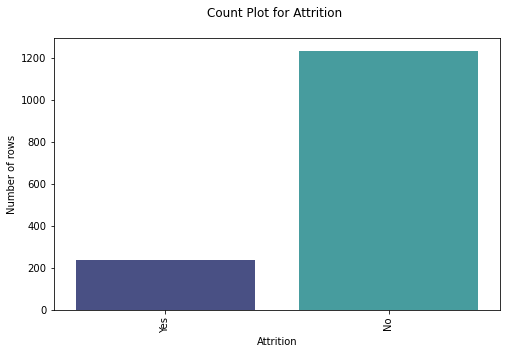

In [17]:
plt.figure(figsize=(8,5)) 
ax = sns.countplot(df['Attrition'], palette="mako")
plt.title(f"Count Plot for Attrition \n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

#### From above count plot we can see that our Label column is class imbalance we need to take care of it in later in this project.

#### Visualisation of  Categorical data using count plots
#### Count plot for Business Travel Column

In [18]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

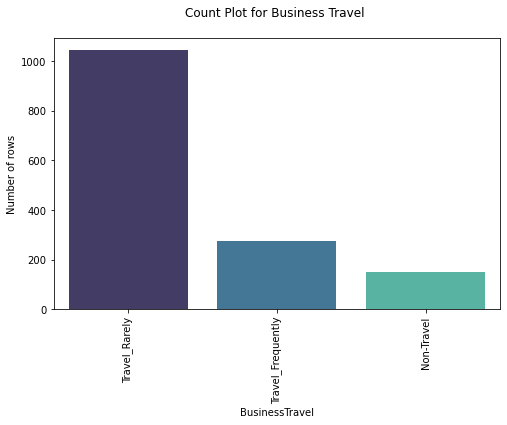

In [19]:
plt.figure(figsize=(8,5)) 
ax = sns.countplot(df['BusinessTravel'], palette="mako")
plt.title(f"Count Plot for Business Travel \n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

#### Non-Travel employees are least, while Travel_rarely employees are the highest in the organizatin

#### Countplot for Department

In [20]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

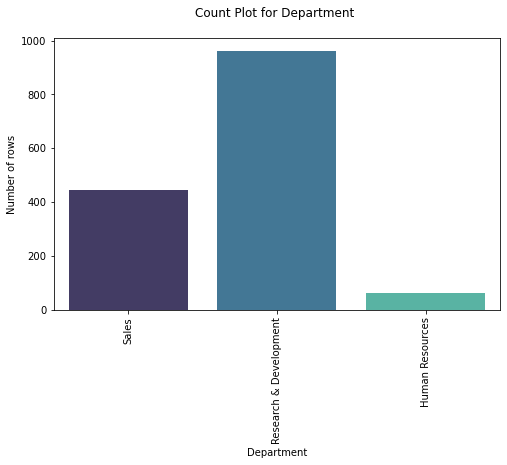

In [21]:
plt.figure(figsize=(8,5)) 
ax = sns.countplot(df['Department'], palette="mako")
plt.title(f"Count Plot for Department \n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

#### R&D Deptt. has the most number of employees while Human Resources have Least number of employees

#### Checking the plot for 'EducationField'

In [22]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

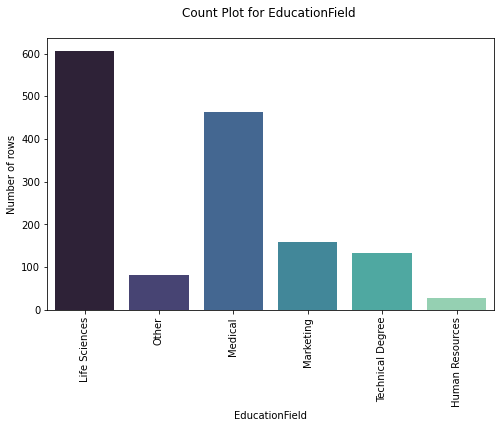

In [23]:
plt.figure(figsize=(8,5)) 
ax = sns.countplot(df['EducationField'], palette="mako")
plt.title(f"Count Plot for EducationField \n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

#### Most of the Epmloyees having Lifescinece Degree and Least employees are having HR Degree

#### PLotting for 'Gender',
 

In [24]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

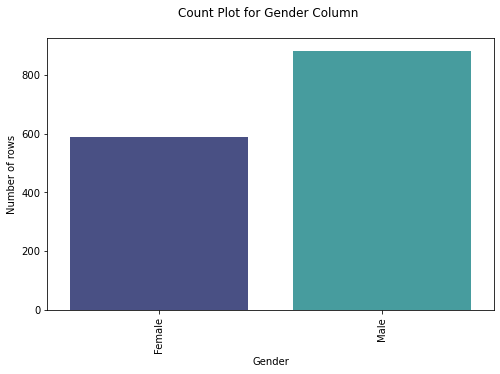

In [25]:

plt.figure(figsize=(8,5)) 
ax = sns.countplot(df['Gender'], palette="mako")
plt.title(f"Count Plot for Gender Column \n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

#### Number of females are less than Number of Males in the Organization
#### Plotting the graph for 'JobRole'

In [26]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

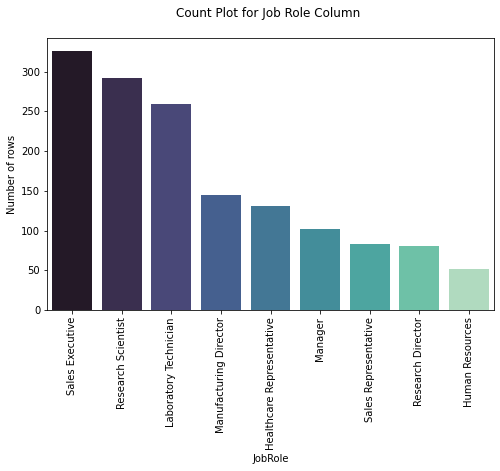

In [27]:
plt.figure(figsize=(8,5)) 
ax = sns.countplot(df['JobRole'], palette="mako")
plt.title(f"Count Plot for Job Role Column \n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

#### Maximum employees are in Sales and least numbers of employees are in Human Resources
#### Plotting for 'MaritalStatus

In [28]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

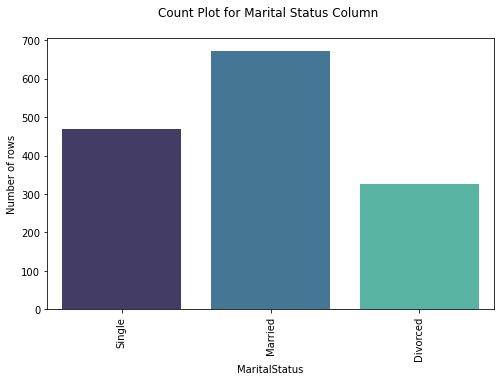

In [29]:
plt.figure(figsize=(8,5)) 
ax = sns.countplot(df['MaritalStatus'], palette="mako")
plt.title(f"Count Plot for Marital Status Column \n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

#### From above plot its clear max number of employees are Married and least are Divorced

#### Plotting for OverTime'

In [30]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

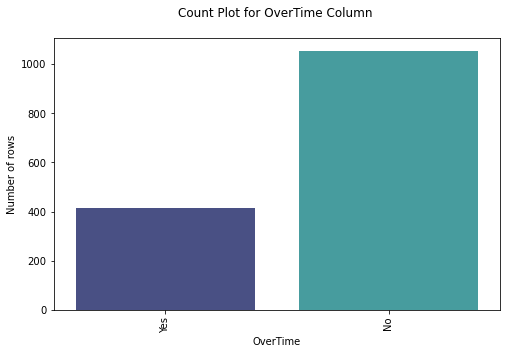

In [31]:
plt.figure(figsize=(8,5)) 
ax = sns.countplot(df['OverTime'], palette="mako")
plt.title(f"Count Plot for OverTime Column \n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

__Most of the employees are not comfirtable with OverTime__

In [32]:
df['Age']

0       41
1       49
2       37
3       33
4       27
        ..
1465    36
1466    39
1467    27
1468    49
1469    34
Name: Age, Length: 1470, dtype: int64

In [33]:
df_data=df[df_integer]

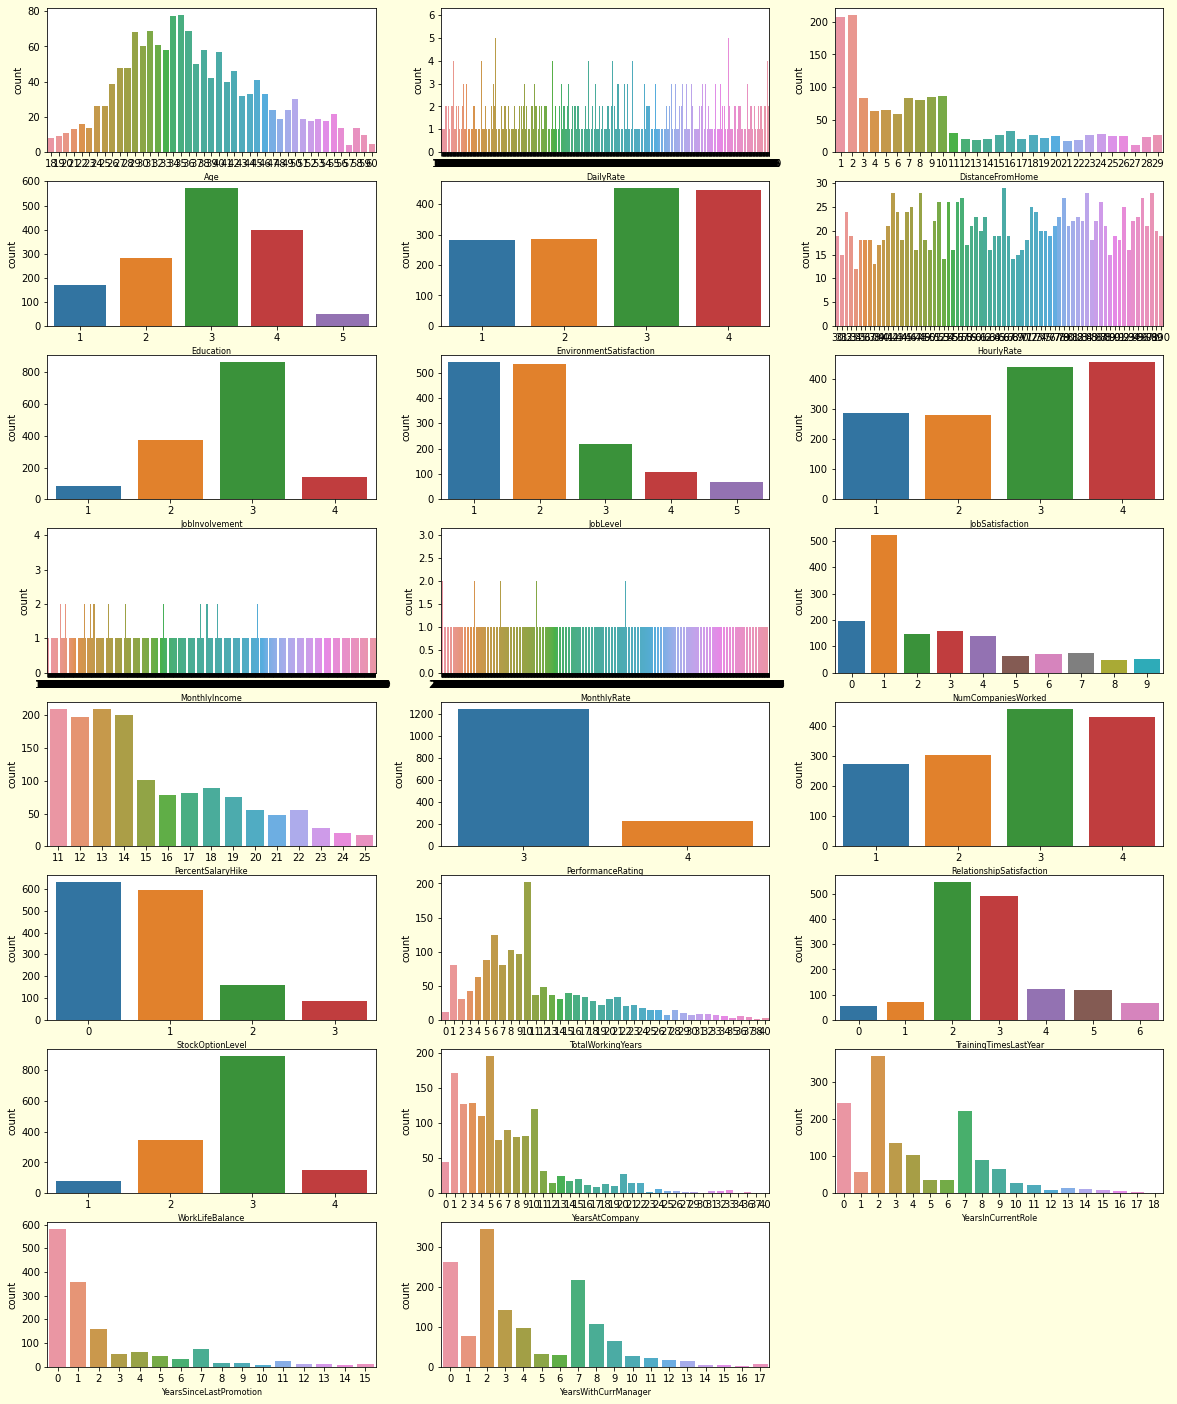

In [34]:
plt.figure(figsize=(20,25),facecolor='lightyellow')
plotnumber=1
for column in df_data:
    if plotnumber<=24:
        ax=plt.subplot(8,3,plotnumber)
        sns.countplot(df_data[column])
        plt.xlabel(column,fontsize=8)
    plotnumber +=1
    
plt.show() 


In [37]:
## From the above plots we can check the countplots for integer/continous data 

__Visualization of Continous Columns__

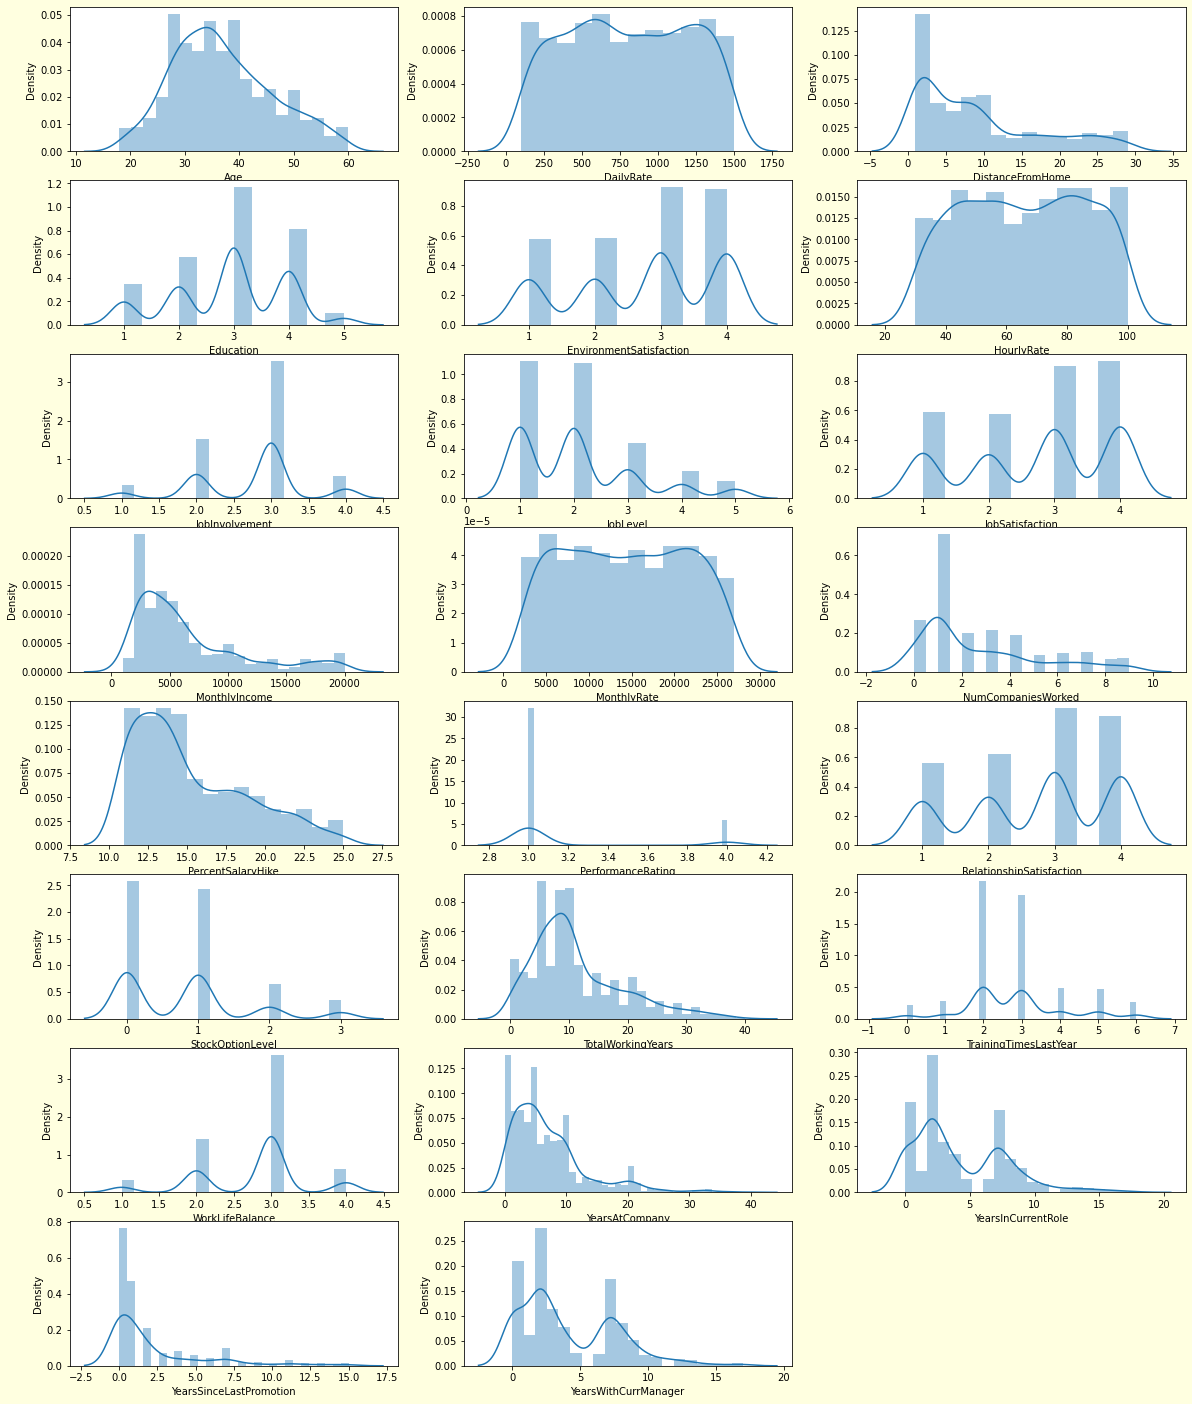

In [35]:
plt.figure(figsize=(20,25),facecolor='lightyellow')
plotnumber=1
for column in df_data:
    if plotnumber<=24:
        ax=plt.subplot(8,3,plotnumber)
        sns.distplot(df_data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber +=1
    
plt.show() 

__Observation:__

1. With the help of above distribution plot we are able to see some skewness present in few columns that will need to be handled as well.

2. This skewness indicates some of the outliers present in the columns.

__Lets observe this in boxplot as well__

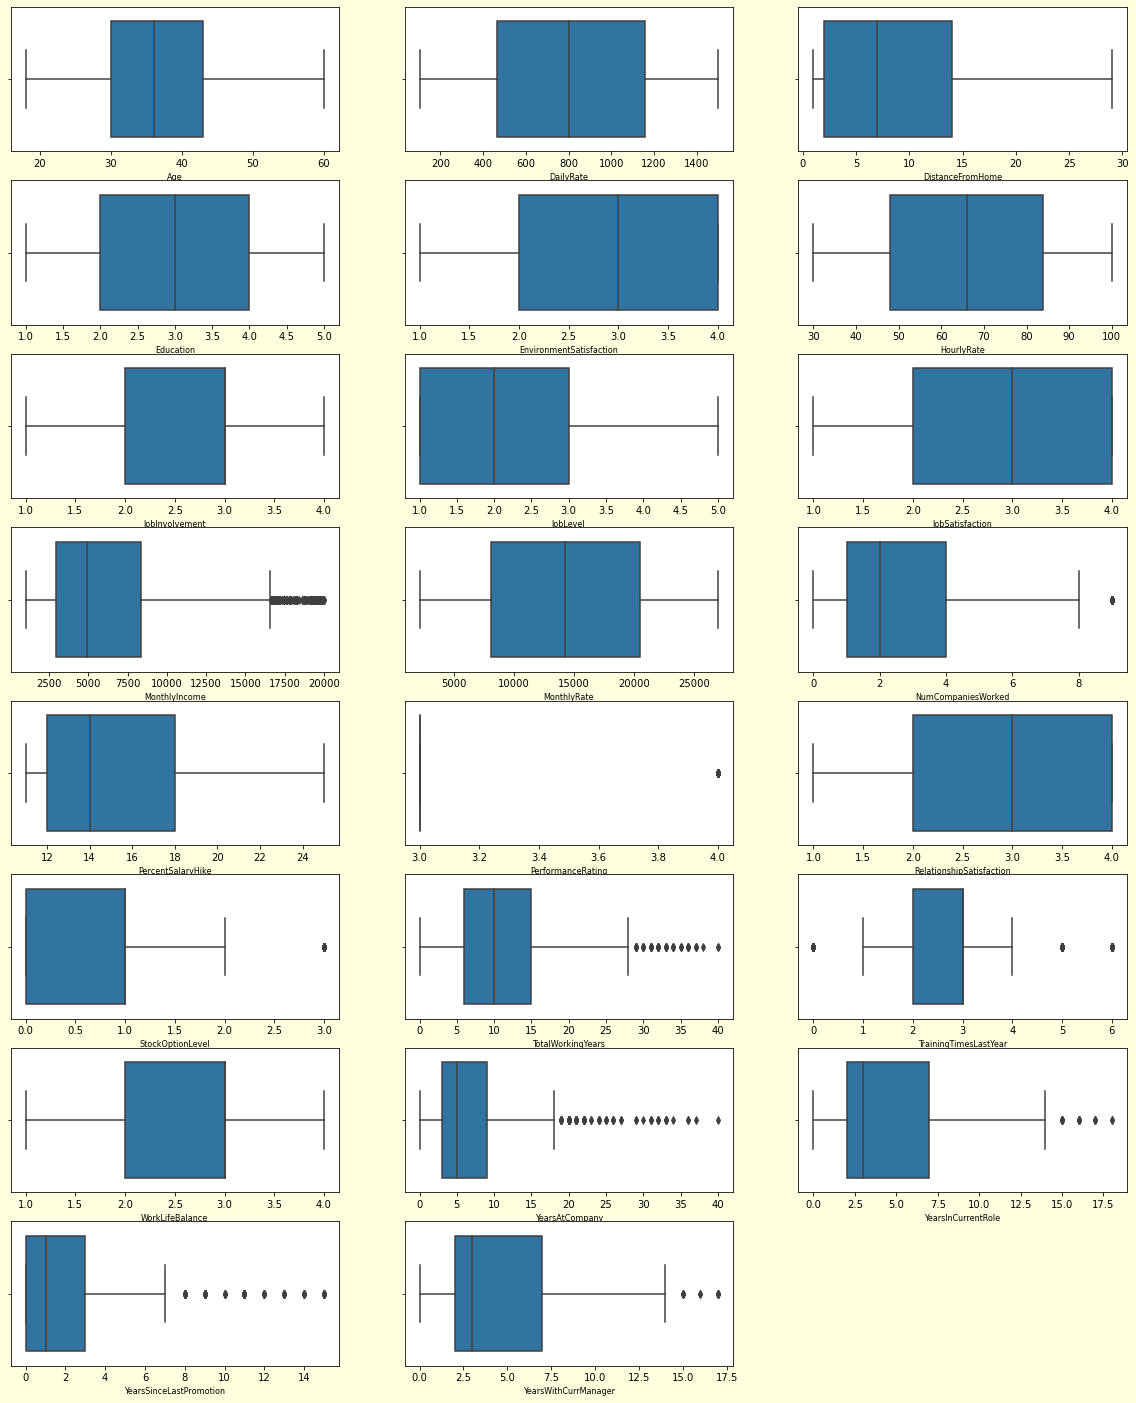

In [39]:
plt.figure(figsize=(20,25),facecolor='lightyellow')
plotnumber=1
for column in df_data:
    if plotnumber<=24:
        ax=plt.subplot(8,3,plotnumber)
        sns.boxplot(df_data[column])
        plt.xlabel(column,fontsize=8)
    plotnumber +=1
    
plt.show() 

__Columns__<br>MonthlyIncome<br>
NumCompaniesWorked<br>
PerformanceRating<br>
StockOptionLevel<br>
TotalWorkingYears<br>
TrainingTimesLastYear<br>YearsAtCompany<br>YearsInCurrentRole<br>YearsSinceLastPromotion<br>YearsWithCurrManager<br>.

All the above columns show visible outlier details. Which we deal later in the project as we do have categorical data so we need to encode those columns as well.



### Encoding the categorical object datatype columns

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [37]:
le=LabelEncoder()
le.fit(df["Attrition"])
le.classes_
pd.Series(le.transform(df["Attrition"])).head()


0    1
1    0
2    1
3    0
4    0
dtype: int32

In [38]:
df["Attrition"] = le.fit_transform(df["Attrition"])
df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

Converted Attrition columnwhere - No-0 and Yes-1

In [39]:
oe = OrdinalEncoder()
df['BusinessTravel'] = oe.fit_transform(df['BusinessTravel'].values.reshape(-1,1))
df['Department'] = oe.fit_transform(df['Department'].values.reshape(-1,1))
df['EducationField'] = oe.fit_transform(df['EducationField'].values.reshape(-1,1))
df['Gender'] = oe.fit_transform(df['Gender'].values.reshape(-1,1))
df['JobRole'] = oe.fit_transform(df['JobRole'].values.reshape(-1,1))
df['MaritalStatus'] = oe.fit_transform(df['MaritalStatus'].values.reshape(-1,1))
df['OverTime'] = oe.fit_transform(df['OverTime'].values.reshape(-1,1))

In [40]:
df.head()


Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1             2.0       1102         2.0                 1   
1   49          0             1.0        279         1.0                 8   
2   37          1             2.0       1373         1.0                 2   
3   33          0             1.0       1392         1.0                 3   
4   27          0             2.0        591         1.0                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2             1.0                        2     0.0  ...   
1          1             1.0                        3     1.0  ...   
2          2             4.0                        4     1.0  ...   
3          4             1.0                        4     0.0  ...   
4          1             3.0                        1     1.0  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

In the above dataframe we can clearly see that all our object datatype columns are now converted to numerical datatype which can be used in our machine learning models.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int32  
 2   BusinessTravel            1470 non-null   float64
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   float64
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   float64
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   float64
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   float64
 14  JobSatis

Now as our dataset is in numerical forms we can proceed with the handling of the skewness of the dataset as in the distplot, boxplot we observed some skewness nd outliers lets handle this now

In [42]:
df_skew=pd.DataFrame({})
df_skew['Columns']=df.columns
df_skew['Skewness']=list(df.skew())
df_skew

Columns  Skewness
0                        Age  0.413286
1                  Attrition  1.844366
2             BusinessTravel -1.439006
3                  DailyRate -0.003519
4                 Department  0.172231
5           DistanceFromHome  0.958118
6                  Education -0.289681
7             EducationField  0.550371
8    EnvironmentSatisfaction -0.321654
9                     Gender -0.408665
10                HourlyRate -0.032311
11            JobInvolvement -0.498419
12                  JobLevel  1.025401
13                   JobRole -0.357270
14           JobSatisfaction -0.329672
15             MaritalStatus -0.152175
16             MonthlyIncome  1.369817
17               MonthlyRate  0.018578
18        NumCompaniesWorked  1.026471
19                  OverTime  0.964489
20         PercentSalaryHike  0.821128
21         PerformanceRating  1.921883
22  RelationshipSatisfaction -0.302828
23          StockOptionLevel  0.968980
24         TotalWorkingYears  1.117172
25     TrainingTimesLastYear  0.553124
26           WorkLifeBalance -0.552480
27            YearsAtCompany  1.764529
28        YearsInCurrentRole  0.917363
29   YearsSinceLastPromotion  1.984290
30      YearsWithCurrManager  0.833451

### Removing outliers using zscore

In [43]:
from scipy.stats import zscore

In [44]:
z=np.abs(zscore(df))

In [45]:
threshold = 3
df_new=df[(z<3).all(axis = 1)]


In [46]:
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df_new.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df_new.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (1470, 31)
Shape of the dataframe after removing outliers:  (1387, 31)
Percentage of data loss post outlier removal:  5.646258503401361


In [47]:
## Again chekc with the boxplot

In [48]:
df_skew['After Z score']=list(df_new.skew())
df_skew

Columns  Skewness  After Z score
0                        Age  0.413286       0.472280
1                  Attrition  1.844366       1.805983
2             BusinessTravel -1.439006      -1.426774
3                  DailyRate -0.003519      -0.017078
4                 Department  0.172231       0.183919
5           DistanceFromHome  0.958118       0.954752
6                  Education -0.289681      -0.289024
7             EducationField  0.550371       0.544868
8    EnvironmentSatisfaction -0.321654      -0.325285
9                     Gender -0.408665      -0.417296
10                HourlyRate -0.032311      -0.030481
11            JobInvolvement -0.498419      -0.501401
12                  JobLevel  1.025401       1.126075
13                   JobRole -0.357270      -0.386843
14           JobSatisfaction -0.329672      -0.345612
15             MaritalStatus -0.152175      -0.160952
16             MonthlyIncome  1.369817       1.544770
17               MonthlyRate  0.018578       0.030596
18        NumCompaniesWorked  1.026471       1.037715
19                  OverTime  0.964489       0.954751
20         PercentSalaryHike  0.821128       0.800592
21         PerformanceRating  1.921883       1.931566
22  RelationshipSatisfaction -0.302828      -0.295686
23          StockOptionLevel  0.968980       0.962332
24         TotalWorkingYears  1.117172       1.034487
25     TrainingTimesLastYear  0.553124       0.577614
26           WorkLifeBalance -0.552480      -0.557100
27            YearsAtCompany  1.764529       1.248623
28        YearsInCurrentRole  0.917363       0.726675
29   YearsSinceLastPromotion  1.984290       1.756335
30      YearsWithCurrManager  0.833451       0.694506

In [49]:
df=df_new.copy()#reasigning the new values to the exsiting df
df

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1             2.0       1102         2.0                 1   
1      49          0             1.0        279         1.0                 8   
2      37          1             2.0       1373         1.0                 2   
3      33          0             1.0       1392         1.0                 3   
4      27          0             2.0        591         1.0                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0             1.0        884         1.0                23   
1466   39          0             2.0        613         1.0                 6   
1467   27          0             2.0        155         1.0                 4   
1468   49          0             1.0       1023         2.0                 2   
1469   34          0             2.0        628         1.0                 8   

      Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0             2             1.0                        2     0.0  ...   
1             1             1.0                        3     1.0  ...   
2             2             4.0                        4     1.0  ...   
3             4             1.0                        4     0.0  ...   
4             1             3.0                        1     1.0  ...   
...         ...             ...                      ...     ...  ...   
1465          2             3.0                        3     1.0  ...   
1466          1             3.0                        4     1.0  ...   
1467          3             1.0                        2     1.0  ...   
1468          3             3.0                        4     1.0  ...   
1469          3             3.0                        2     1.0  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465           

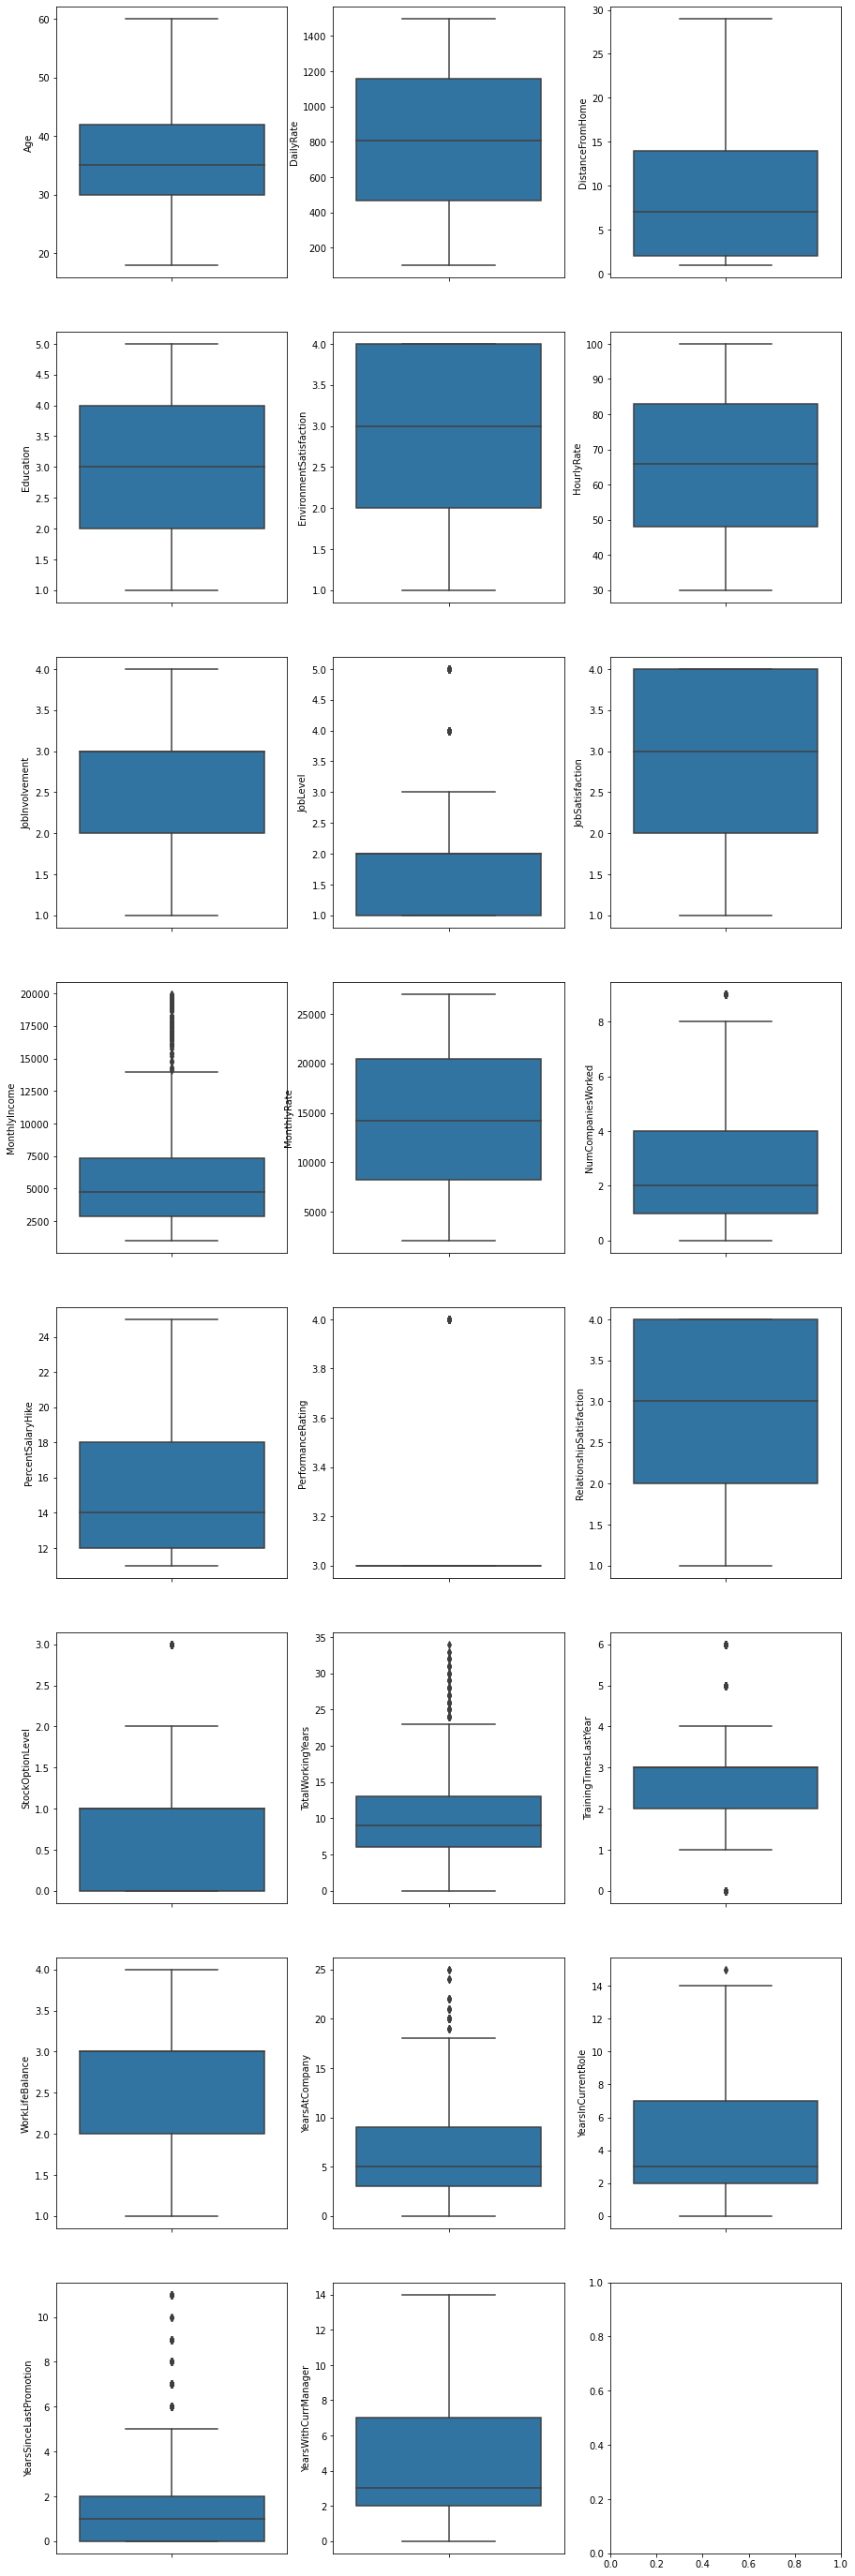

In [50]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[df_integer].items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.show()

n the above box plot we can see that whatever outliers we could have afforded to lose from our numerical columns we have gotten rid of it. There are still presence of outliers but since they are in continous format we shall ignore it.

In [51]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

With the skew method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 value.



In [52]:
#Applying sqrt transformation to reduce skewness
df['DistanceFromHome']=np.log(df['DistanceFromHome'])
df['DistanceFromHome'].skew()

-0.24776884507553448

Skewness reduced from 0.954752 to -.6015


In [53]:
#Applying sqrt transformation to reduce skewness
df['MonthlyIncome']=np.log(df['MonthlyIncome'])
df['MonthlyIncome'].skew()

0.3185925475169437

Skewness reduced from  1.544  to 0.16

In [54]:
#Applying sqrt transformation to reduce skewness
df['NumCompaniesWorked']=np.log(df['NumCompaniesWorked']+1)
df['NumCompaniesWorked'].skew()

0.10128761824948139

Skewness reduced from 1.03 to -0.51

In [55]:
#Applying sqrt transformation to reduce skewness
df['TotalWorkingYears']=np.sqrt(df['TotalWorkingYears']+1)
df['TotalWorkingYears'].skew()

0.2514680108455782

Skewness reduced from 1.034487 to -1.15

In [56]:
#Applying sqrt transformation to reduce skewness
df['YearsInCurrentRole']=np.sqrt(df['YearsInCurrentRole']+1)
df['YearsInCurrentRole'].skew()

0.19338282833787906

Skewness Reduced from 0.726675 to -0.674

In [57]:
#Applying log transformation to reduce skewness
df['YearsSinceLastPromotion']=np.log(df['YearsSinceLastPromotion']+1)
df['YearsSinceLastPromotion'].skew()

0.6953478735711569

skewness reduced from 1.75 to .24

In [58]:
#Applying sqrt transformation to reduce skewness
df['YearsWithCurrManager']=np.sqrt(df['YearsWithCurrManager']+1)
df['YearsWithCurrManager'].skew()

0.19957016364003702

Skewness removed from 0.69 to -0.612

__Visulaise the skewness__ 

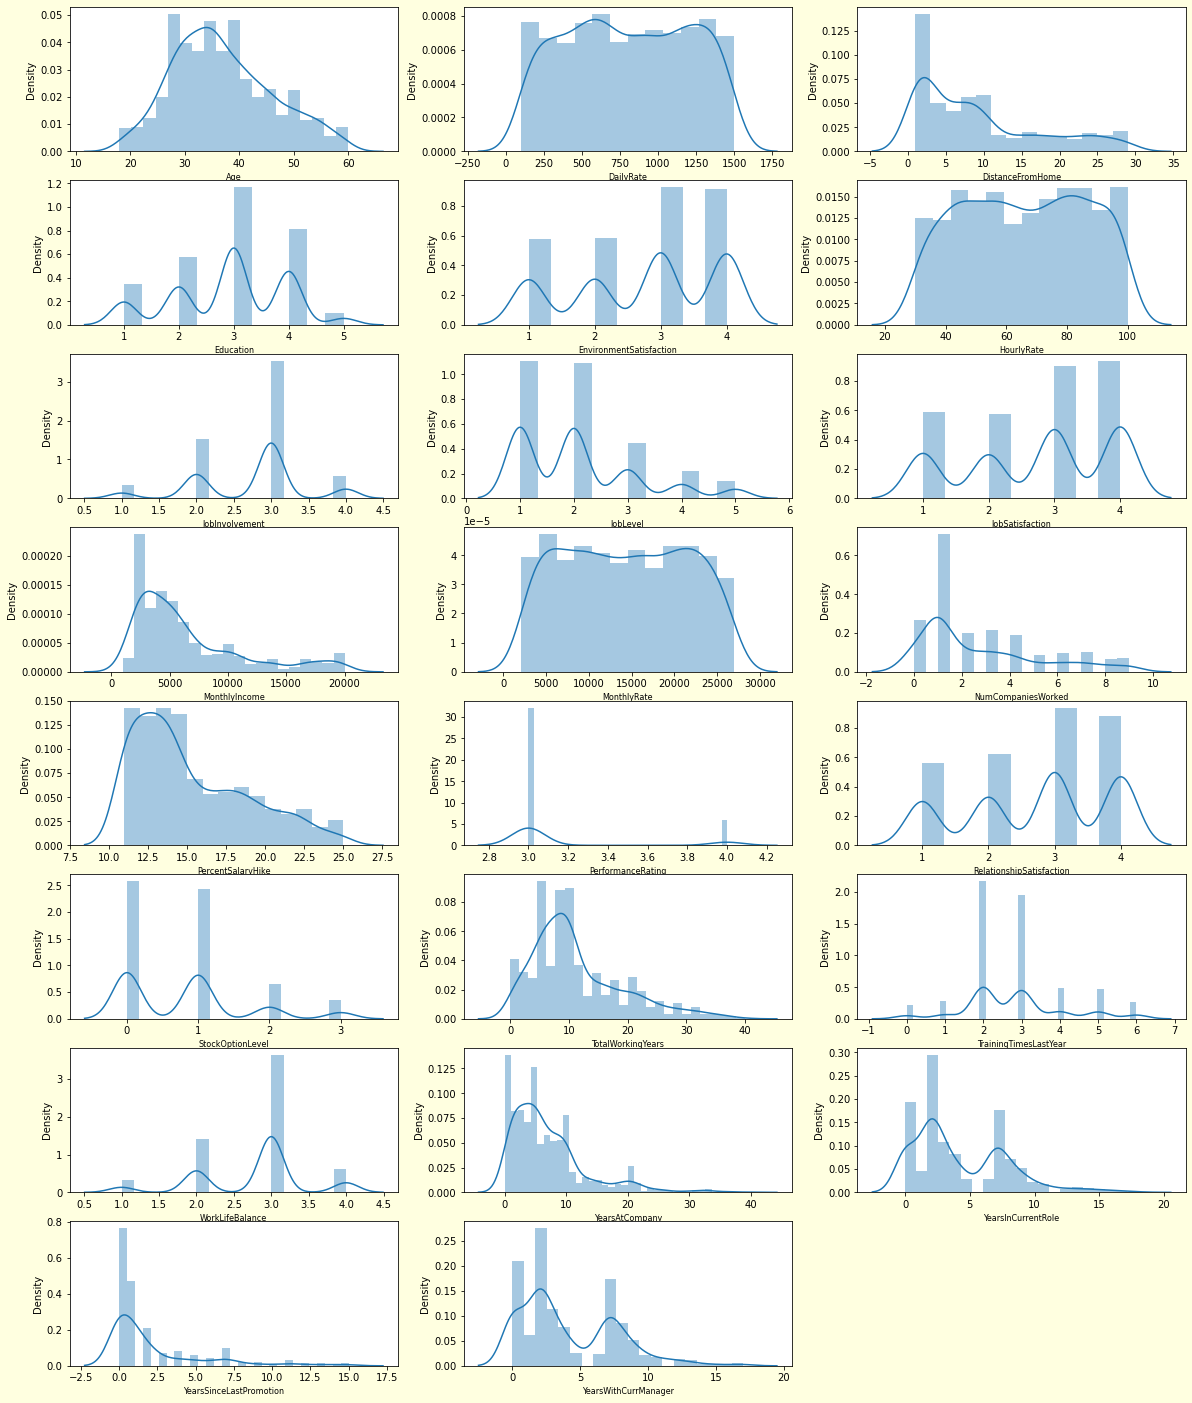

In [59]:
plt.figure(figsize=(20,25),facecolor='lightyellow')
plotnumber=1
for column in df_data:
    if plotnumber<=24:
        ax=plt.subplot(8,3,plotnumber)
        sns.distplot(df_data[column])
        plt.xlabel(column,fontsize=8)
    plotnumber +=1
    
plt.show() 


### Finding the Correlationship with the help of heatmap

In [60]:
df.corr()

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159366        0.022340   0.021946   
Attrition                -0.159366   1.000000       -0.001041  -0.057220   
BusinessTravel            0.022340  -0.001041        1.000000  -0.004606   
DailyRate                 0.021946  -0.057220       -0.004606   1.000000   
Department               -0.038242   0.063637       -0.003521  -0.005398   
DistanceFromHome         -0.031141   0.078926       -0.009967  -0.003633   
Education                 0.198502  -0.032703       -0.010560  -0.018442   
EducationField           -0.032676   0.023585        0.022576   0.040645   
EnvironmentSatisfaction   0.014098  -0.112393        0.001183   0.033123   
Gender                   -0.039430   0.036252       -0.025364  -0.005242   
HourlyRate                0.025465  -0.001532        0.025424   0.014279   
JobInvolvement            0.036424  -0.133957        0.028261   0.048004   
JobLevel                  0.453902  -0.171968        0.018996   0.022978   
JobRole                  -0.112957   0.064283        0.000213  -0.015437   
JobSatisfaction           0.011763  -0.114206       -0.032491   0.042698   
MaritalStatus            -0.104372   0.160960        0.018687  -0.074113   
MonthlyIncome             0.442412  -0.199625        0.029115   0.030873   
MonthlyRate               0.026954   0.014888       -0.010307  -0.029844   
NumCompaniesWorked        0.339617   0.047620        0.026653   0.033297   
OverTime                  0.034180   0.257237        0.022378   0.020294   
PercentSalaryHike         0.005891  -0.006267       -0.023004   0.027802   
PerformanceRating        -0.000617   0.010781       -0.018274   0.000574   
RelationshipSatisfaction  0.041744  -0.052344       -0.029660   0.004516   
StockOptionLevel          0.054506  -0.136676       -0.015159   0.048361   
TotalWorkingYears         0.638705  -0.213150        0.031089   0.044136   
TrainingTimesLastYear    -0.019008  -0.057285        0.010322   0.005861   
WorkLifeBalance          -0.016913  -0.062492       -0.014140  -0.044266   
YearsAtCompany            0.177620  -0.166455       -0.027164  -0.003580   
YearsInCurrentRole        0.120487  -0.182736       -0.031853   0.021181   
YearsSinceLastPromotion   0.108183  -0.044252       -0.027484  -0.038133   
YearsWithCurrManager      0.118160  -0.178678       -0.037386   0.000760   

                          Department  DistanceFromHome  Education  \
Age                        -0.038242         -0.031141   0.198502   
Attrition                   0.063637          0.078926  -0.032703   
BusinessTravel             -0.003521         -0.009967  -0.010560   
DailyRate                  -0.005398         -0.003633  -0.018442   
Department                  1.000000          0.041307   0.012846   
DistanceFromHome            0.041307          1.000000   0.001405   
Education                   0.012846          0.001405   1.000000   
EducationField              0.013432          0.014231  -0.038017   
EnvironmentSatisfaction    -0.014540         -0.010442  -0.026223   
Gender                     -0.030618          0.012771  -0.019166   
HourlyRate                 -0.002412          0.010889   0.010848   
JobInvolvement             -0.024040          0.041917   0.041343   
JobLevel                    0.126809         -0.005991   0.083065   
JobRole                     0.678627          0.012151   0.015140   
JobSatisfaction             0.029521         -0.019720  -0.007219   
MaritalStatus               0.052086         -0.026211  -0.012726   
MonthlyIncome               0.143290         -0.005966   0.105745   
MonthlyRate                 0.022741          0.050167  -0.018540   
NumCompaniesWorked         -0.034946         -0.008220   0.138290   
OverTime                    0.014908          0.038457  -0.017166   
PercentSalaryHike          -0.022678          0.036031  -0.011344   
PerformanceRating          -0.039364          0.010512  -0.023487   
Relationshi

### Plotting heatmap of df.corr()

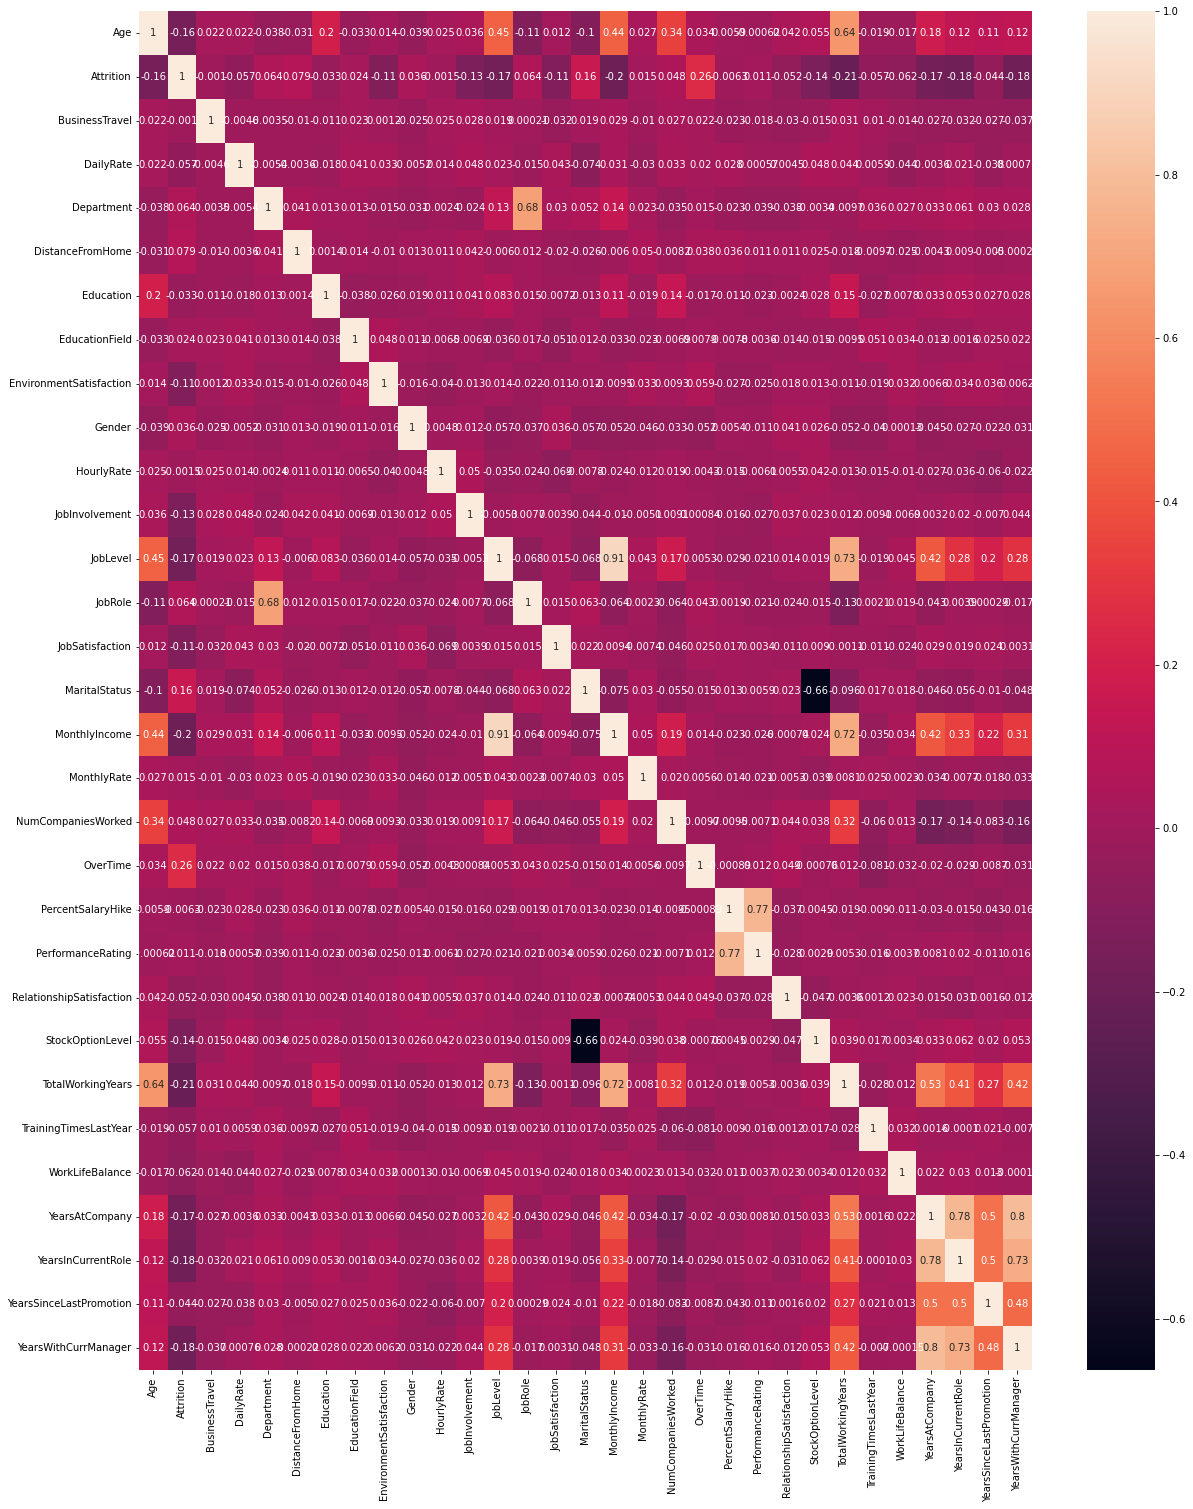

In [61]:
plt.figure(figsize=(20,25))
sns.heatmap(df.corr(),annot=True)
plt.show()

__Positive correlation__ - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.<br>
__Negative correlation__ - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

In the above heatmap we can see that our target label "Attrition" has both positive and negative correlations with the feature columns.<br>
Clumns- YearsatCOmpany and YearsinCurrentRole,YearsWithCurrManager,PerformanceRating,PercentSalaryHIke are correlated with the values close to 1 so we can drop these columns.



In [62]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

We will drop these columns from the dataset as they are less contributing in the target column.

In [63]:
drop_cols=['YearsWithCurrManager','YearsAtCompany','DailyRate','EducationField','DistanceFromHome','NumCompaniesWorked']

In [64]:
df=df.drop(['YearsWithCurrManager','YearsAtCompany','DailyRate',
         'EducationField','DistanceFromHome','NumCompaniesWorked'],axis=1)

In [65]:
print("New shape of the dataset",df.shape)

New shape of the dataset (1387, 25)


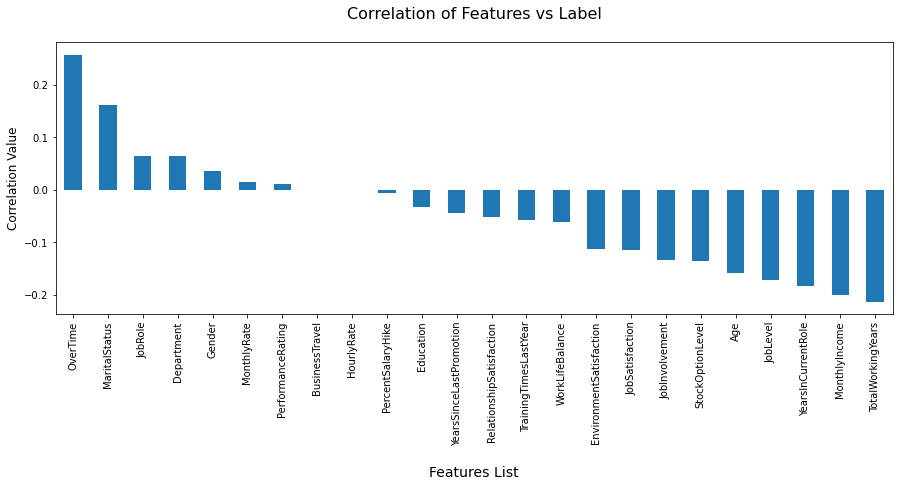

In [66]:
df_corr = df.corr()
plt.figure(figsize=(15,5))
df_corr['Attrition'].sort_values(ascending=False).drop('Attrition').plot.bar()
plt.title("Correlation of Features vs Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

In the above Bar Plot we are able to clearly define the feature columns that are positively correlated with our label and the feature columns that are negatively correlated with our label.

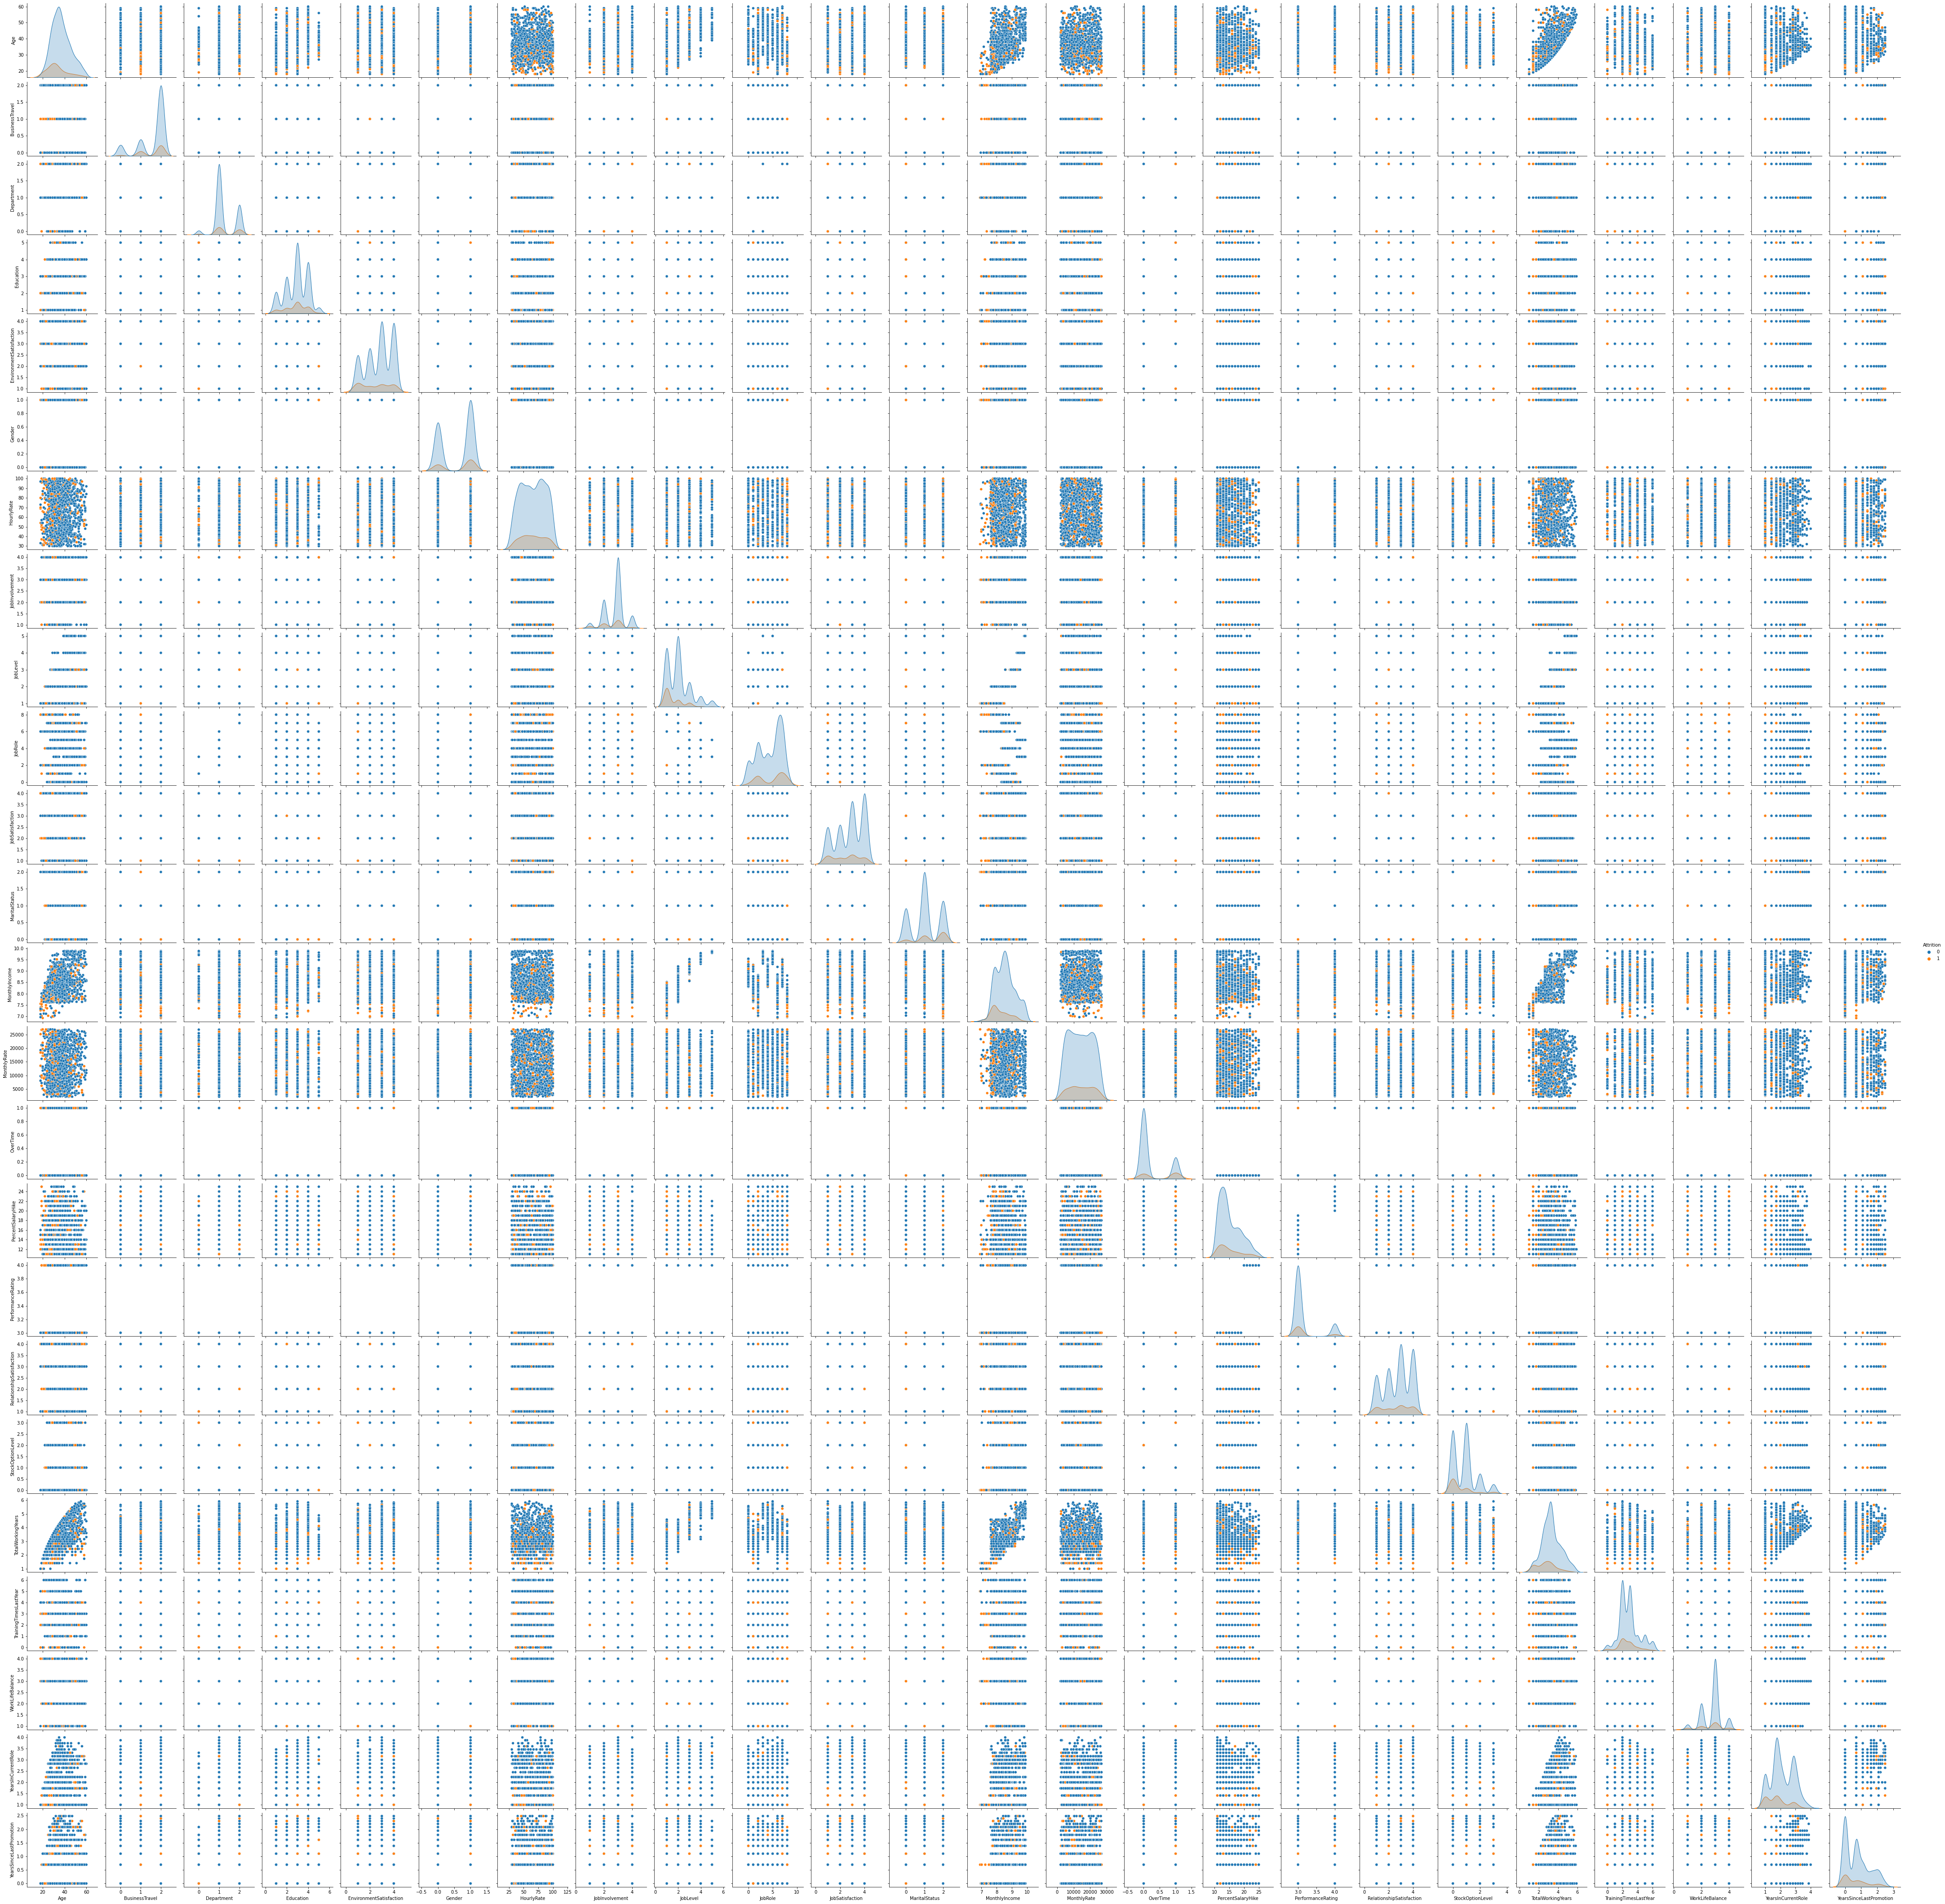

In [67]:
sns.pairplot(df,hue='Attrition')


__We can see the visulaisation of each column__

### Splitting the dataset into 2 variables namely 'x' and 'y' for feature and label

In [68]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']

#### Resolving the class imbalance issue in label column

In [69]:
y.value_counts(normalize=True)

0    0.834895
1    0.165105
Name: Attrition, dtype: float64

Listing the values of our label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

In [70]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [71]:
y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

### Scaling the Features

In [72]:
scaler=StandardScaler()

In [73]:
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.71143271,  0.6599217 ,  1.43180135, ..., -2.17039488,
         0.39922462, -0.98193603],
       [ 1.62668235, -0.99484435, -0.57478719, ...,  0.53500584,
         1.24580631,  0.00946983],
       [ 0.25380789,  0.6599217 , -0.57478719, ...,  0.53500584,
        -1.36732617, -0.98193603],
       ...,
       [-1.11906656, -0.99484435,  0.53007019, ...,  0.53500584,
         0.49323598,  0.59841935],
       [-1.57669138, -0.99484435,  0.97554786, ...,  0.53500584,
        -0.3211014 ,  0.00946983],
       [ 0.82583892, -2.64961039, -0.57478719, ..., -0.81769452,
         0.80924579,  1.67008382]])

In [74]:
#Finding the best random state
lr=LogisticRegression()
maxAcc=0
rs=0
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=accuracy_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
print('Best score:',maxAcc)
print('Random State:',rs)

Best score: 0.8512931034482759
Random State: 723


__Splitting the dataset at random state__

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=723)

In [78]:
print("Shape of x_train",x_train.shape)    
print("Shape of x_test",x_test.shape)    
print("Shape of y_train",y_train.shape)    
print("Shape of y_test",y_test.shape)  

Shape of x_train (1852, 24)
Shape of x_test (464, 24)
Shape of y_train (1852,)
Shape of y_test (464,)


## Writing one function for different models accuracy


In [79]:

# Classification Model Function

def classify(clf, x_scaled, y):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state=826)
    
    # Training the model
    clf.fit(x_train,y_train)
    
    # Predicting Y_test
    pred = clf.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(clf, x_scaled, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

## Logistic Regression



In [80]:
clf=LogisticRegression()
classify(clf, x_scaled, y)

Accuracy Score: 87.93103448275862

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       230
           1       0.88      0.88      0.88       234

    accuracy                           0.88       464
   macro avg       0.88      0.88      0.88       464
weighted avg       0.88      0.88      0.88       464

Cross Validation Score: 84.11642585834512

Accuracy Score - Cross Validation Score is 3.814608624413495


## Decision Tree

In [81]:
clf=DecisionTreeClassifier()
classify(clf, x_scaled, y)

Accuracy Score: 86.63793103448276

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       230
           1       0.88      0.85      0.87       234

    accuracy                           0.87       464
   macro avg       0.87      0.87      0.87       464
weighted avg       0.87      0.87      0.87       464

Cross Validation Score: 83.85966708870187

Accuracy Score - Cross Validation Score is 2.7782639457808926


## RandomForest

In [82]:
clf=RandomForestClassifier()
classify(clf, x_scaled, y)

Accuracy Score: 92.67241379310344

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       230
           1       0.97      0.88      0.92       234

    accuracy                           0.93       464
   macro avg       0.93      0.93      0.93       464
weighted avg       0.93      0.93      0.93       464

Cross Validation Score: 90.0800625605124

Accuracy Score - Cross Validation Score is 2.5923512325910423


## SVC

In [83]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [84]:
clf=SVC()
classify(clf, x_scaled, y)

Accuracy Score: 89.65517241379311

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       230
           1       0.91      0.88      0.90       234

    accuracy                           0.90       464
   macro avg       0.90      0.90      0.90       464
weighted avg       0.90      0.90      0.90       464

Cross Validation Score: 88.39428018172339

Accuracy Score - Cross Validation Score is 1.2608922320697218


## KNN

In [85]:
clf=KNeighborsClassifier()
classify(clf, x_scaled, y)

Accuracy Score: 86.42241379310344

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.73      0.84       230
           1       0.79      1.00      0.88       234

    accuracy                           0.86       464
   macro avg       0.89      0.86      0.86       464
weighted avg       0.89      0.86      0.86       464

Cross Validation Score: 85.32015714604901

Accuracy Score - Cross Validation Score is 1.102256647054432


## XGB

In [86]:
import xgboost as xgb

In [87]:
clf=xgb.XGBClassifier()

clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [88]:
classify(clf, x_scaled, y)

Accuracy Score: 90.94827586206897

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       230
           1       0.93      0.88      0.91       234

    accuracy                           0.91       464
   macro avg       0.91      0.91      0.91       464
weighted avg       0.91      0.91      0.91       464

Cross Validation Score: 88.7874245922395

Accuracy Score - Cross Validation Score is 2.1608512698294646


__By comparing f1 scores and cvscore SVC is the best model, it has the less difference__



### Hyper parameter tuning on the best Classification ML Model

In [89]:
param = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
             

In [90]:
grid = GridSearchCV(SVC(), param, cv=5)
grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [91]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [92]:
grid.best_score_


0.9341225322357397

In [93]:
svcfinal = SVC(C=10,gamma=0.1,kernel='rbf')
Classifier = svcfinal.fit(x_train, y_train)
svc_pred = svcfinal.predict(x_test)
svc_acc = (accuracy_score(y_test, svc_pred))*100
print("Accuracy score for the Best Model is:", svc_acc)

Accuracy score for the Best Model is: 94.61206896551724


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and accuracy increased from 89.8 to 95.2


In [94]:
print("Classification_report\n",classification_report(y_test,svc_pred))

Classification_report
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       226
           1       0.94      0.96      0.95       238

    accuracy                           0.95       464
   macro avg       0.95      0.95      0.95       464
weighted avg       0.95      0.95      0.95       464



### Confusion Matrix

In [96]:
from sklearn import metrics


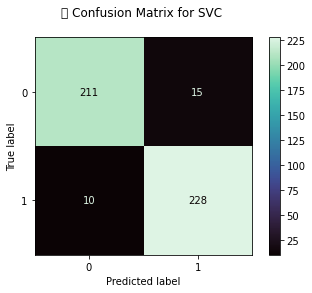

In [97]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for SVC \n')
plt.show()

## AUC ROC curve

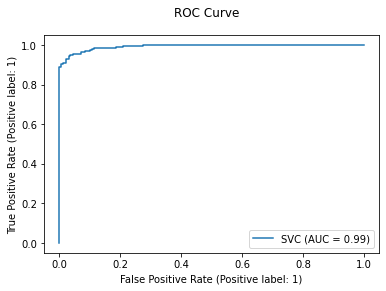

In [98]:
disp = metrics.plot_roc_curve(svcfinal, x_test, y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

## Saving the model

In [99]:
import pickle

In [100]:
filename="Hr Attrition.pkl"

In [101]:
pickle.dump(svcfinal,open(filename,'wb'))

In [102]:
#conclusion
loaded_model=pickle.load(open('Hr Attrition.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

94.61206896551724


In [103]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],svc_pred[:]],index=['Predcited','Orignal'])
conclusion

0    1    2    3    4    5    6    7    8    9    ...  454  455  \
Predcited    1    1    0    0    0    1    0    0    1    0  ...    0    0   
Orignal      1    1    0    0    0    1    0    0    1    0  ...    0    0   

           456  457  458  459  460  461  462  463  
Predcited    0    1    0    0    0    0    1    1  
Orignal      0    1    0    0    0    0    1    1  

[2 rows x 464 columns]

#### Steps:  I followd in the above Dataset.

__1__- loaded the dataset and checked for shape,datatype information, columns and  checked for null /missing value(if any) and took the neccessary step 

2-Checked for unique values count and plot a bar of it(count plot)

3-Described the dataset using .describe() method and wrote down the observation for min, max, mean ,std and skewness.

4- Visulise the skewness using distplot and boxplot techniques after cheking it using.skew() method.

4- Used zscore() method to remove outliers and again checked for skewness and found skewness in dataset so used np.log() method and again chekd for skewness .

5-Checked for Multicoliearity and cooreation using .corr() method and heatmap plot and dropped the highly correlated feture 

6-Plotted pairplot and visulise the relationship among fature and label


7- Split the dataset into features and label and applying transormation on feature using StandardScaler method.

8- Found the best random_state and wrote down single function for mulitple model evaluation.

9- Evaluate the different models based on score, f1score

10- Calculated CV score and selected the best model which had least difference between accuracy and CV score(Ridge Model).

11- Hypertuned the parameter using GridsearchCV and again calculated the scores and r2score increased( forSVC model)(from 89.8 to 95.2).

12- vislauize the model 

13- printed confusion Matrix

14-Plotted AUC ROC curve

15- Saved the model using pickle library

16- Compared  the predicted and Original values